<a href="https://colab.research.google.com/github/BuberDev/Machine_Learning/blob/main/Klasyfikacja_wieloklasowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Import blbliotek


 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.datasets.fashion_mnist import load_data
 from tensorflow.keras.layers import Dense, Flatten

 np.set_printoptions(precision=12, suppress=True, linewidth=150)
 pd.options.display.float_format = '{:.6f}'.format
 sns.set()
 tf.__version__

'2.12.0'

In [2]:
# Zaladowanie danych

(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape:', X_train.shape)
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape:', y_test.shape)
print(f'X_train[0].shape:', X_train[0].shape  )

4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0].shape: (28, 28)


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [4]:
# Numery klas przypozadkowane odpowiednio dla nszych zdjec
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

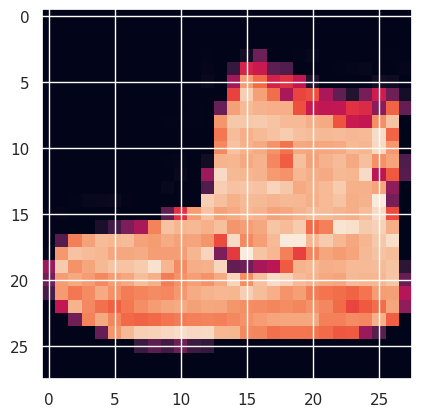

In [5]:
# Wyswietlamy pierwsze zdiecie

plt.imshow(X_train[0])


(-0.5, 27.5, 27.5, -0.5)

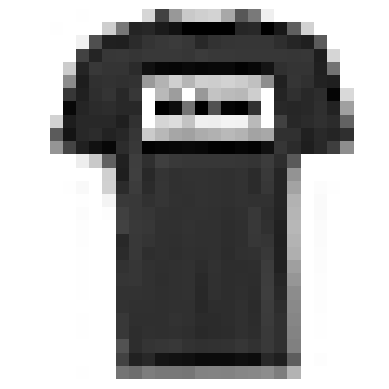

In [6]:
# Wyswietlamy drugie zdiecie ze zbioru treningowego ,a le tym razem bez osi i czarno biale

plt.imshow(X_train[1], cmap="gray_r")
plt.axis("off")

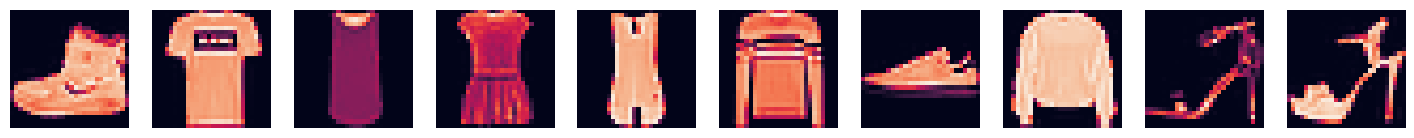

In [7]:
plt.figure(figsize=(18,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(X_train[i-1])
  plt.axis("off")

plt.show()


In [8]:
# Sprawiamy teraz aby wartosci w macierzach kazdego ze zdiec mialy zakres 0 -1
X_train = X_train / 255
X_test = X_test / 255

X_train[0]

array([[0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            

In [9]:
# Bubowa Modelu

model = Sequential()
# Głównym celem warstwy Flatten jest spłaszczenie danych, czyli przekształcenie tensora o dowolnym kształcie (np. [szerokość, wysokość, kanały])
# na pojedynczy wektor o długości równej iloczynowi wymiarów tensora. Na przykład, jeśli wejściowy tensor ma kształt [28, 28, 3],
# to warstwa Flatten przekształci go na wektor o długości 2352 (28 * 28 * 3).
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# epochs - czyli ile razy zestaw treningowy zostanie przetworzony przez model.
#Przy kazdej iteracji optymalizator prubuje dopasowac wagi w celu zminimalizowania funkcji straty

# batch size - liczba przykladow treningowych po ktorej nastepuje aktualizacja flag


history = model.fit(X_train, y_train, epochs= 10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 14s 4ms/step - loss: 0.5179 - accuracy: 0.8195 - val_loss: 0.4364 - val_accuracy: 0.8436
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3881 - accuracy: 0.8619 - val_loss: 0.3721 - val_accuracy: 0.8669
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3448 - accuracy: 0.8763 - val_loss: 0.3487 - val_accuracy: 0.8742
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.8826 - val_loss: 0.3683 - val_accuracy: 0.8672
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.8893 - val_loss: 0.3444 - val_accuracy: 0.8765
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2851 - accuracy: 0.8940 - val_loss: 0.3186 - val_accuracy: 0.8851
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2716 - accuracy: 0.8984 - val_loss: 0.3169 - val_accuracy

In [11]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.517913,0.819542,0.436437,0.843583,0
1,0.388053,0.861896,0.372136,0.866917,1
2,0.344774,0.876250,0.348682,0.874167,2
3,0.319891,0.882563,0.368285,0.867167,3
4,0.301841,0.889333,0.344417,0.876500,4
5,0.285105,0.894021,0.318617,0.885083,5
6,0.271600,0.898417,0.316886,0.886250,6
7,0.262663,0.903146,0.322177,0.886667,7
8,0.249499,0.907042,0.371811,0.877000,8
9,0.241635,0.909479,0.314725,0.889250,9


In [14]:
# Ocena modelu

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics["epoch"], y=metrics["loss"], name="loss"),row=1,col=2)
fig.add_trace(go.Scatter(x=metrics["epoch"], y=metrics["accuracy"], name="accuracy"), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics["val_accuracy"], name="val_accuracy"), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics["epoch"], name="val_loss"), row=1, col=2)

fig.update_xaxes(title_text="epochs")
fig.update_yaxes(title_text="accuracy")
fig.update_layout(width=1000, title="Accuracy and loss")
fig.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.8794000148773193


In [ ]:
# 5. Predykcja na podstawie modelu

# model.evaluate(y_true, y_pred) - pozwala oblilczyc metryki maodelu
# model.predict_classes() - pozwala zwrocic odpowiednio przewidziane klasy ale zostala usunieta od Tensorflow 2.6
        # predict_x=model.predict(X_test)
        # classes_x=np.argmax(predict_x,axis=1)
# model.predict_proba(), model.predict() - pozwala zwrocic prawdopodobienstwo danej klasy

In [17]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.000002850215, 0.000000001807, 0.000000036835, ..., 0.005754375   , 0.00000052299 , 0.99316424    ],
       [0.000010472486, 0.            , 0.99950004    , ..., 0.            , 0.000000000624, 0.            ],
       [0.000000015585, 1.            , 0.000000000001, ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000050697963, 0.000000000014, 0.000008427859, ..., 0.000000001867, 0.99992824    , 0.000000000001],
       [0.000000083054, 0.9999554     , 0.000000000079, ..., 0.            , 0.000000000478, 0.            ],
       [0.000007195873, 0.00000003263 , 0.000001321762, ..., 0.0013800787  , 0.000022102602, 0.000039702732]], dtype=float32)

In [18]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000003,0.000000,0.000000,0.000000,0.000000,0.001077,0.000000,0.005754,0.000001,0.993164
1,0.000010,0.000000,0.999500,0.000000,0.000366,0.000000,0.000123,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.486112,0.000000,0.001240,0.000475,0.000523,0.000000,0.511630,0.000001,0.000018,0.000001
